In [1]:
# pip install jupyter_contrib_nbextensions

In [2]:
################################################################
#  Team Members :
#                 1-Abdullah Abdelhakeem 
#                 2-Mohamed Sebaie
#                 3-Mohamed Mostafa
#                 
#  
#  Version: v1.0.0
#  Description: 30 Days of ML
#  Day: 20/8/2021
#  
#  
###############################################################

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Read CSV Files

In [4]:
# df_train = pd.read_csv("../input/30-days-of-ml/train.csv")
# df_test = pd.read_csv("../input/30-days-of-ml/test.csv")

In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
df_train.columns.size

26

# Check Info about Data

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [8]:
df_train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [9]:
df_train.duplicated().sum()

0

# Check Quantitative and Qualitative Columns

In [10]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != object]
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == object]

# Check Data Distribution

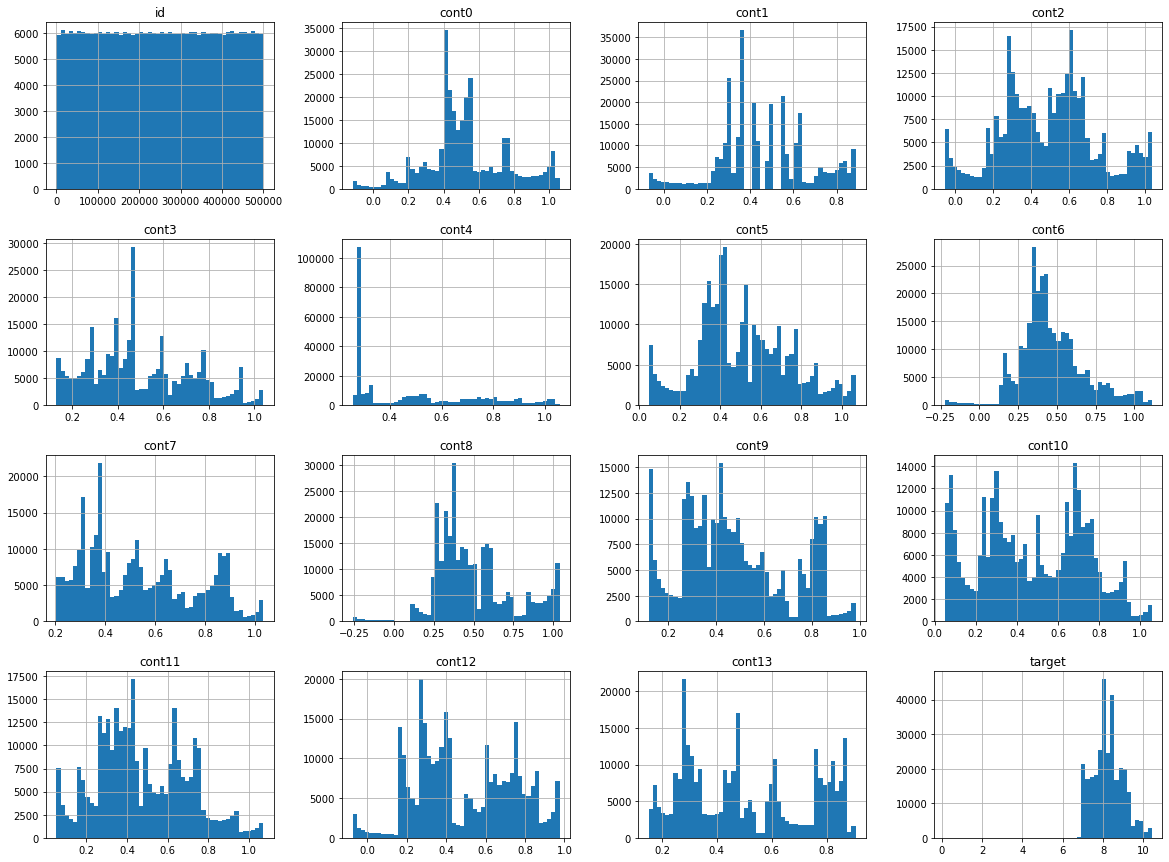

In [11]:
df_train[quantitative].hist(bins = 50, figsize = (20,15))
plt.show()

# Check correlation between Variables

In [12]:
correlation_matrix = df_train[quantitative].corr()
correlation_matrix["target"].sort_values(ascending = False)
correlation_matrix

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,1.000000,0.002445,0.001970,0.001552,0.000595,-0.002411,-0.001864,0.002295,-0.001246,-0.004349,-0.000328,0.000832,0.002284,-0.000480,-0.001694,0.000480
cont0,0.002445,1.000000,-0.009422,-0.296989,0.211333,-0.109776,0.392456,0.133995,0.294687,0.388510,0.394969,0.363413,0.255941,0.417872,0.023234,0.028819
cont1,0.001970,-0.009422,1.000000,-0.000627,-0.002233,-0.000285,0.003812,0.001321,0.013475,-0.021541,-0.002727,-0.001648,-0.017221,-0.006862,-0.010097,-0.002096
cont2,0.001552,-0.296989,-0.000627,1.000000,-0.180856,0.092780,-0.300140,-0.141724,-0.283989,-0.326456,-0.309118,-0.300273,-0.325023,-0.352009,-0.039815,0.034280
cont3,0.000595,0.211333,-0.002233,-0.180856,1.000000,-0.069934,0.201441,0.040133,0.172586,0.185221,0.194807,0.199525,0.140934,0.255117,0.037920,-0.022759
cont4,-0.002411,-0.109776,-0.000285,0.092780,-0.069934,1.000000,-0.148807,-0.044417,-0.095653,-0.122594,-0.123468,-0.132211,-0.115173,-0.151080,-0.012798,-0.023132
cont5,-0.001864,0.392456,0.003812,-0.300140,0.201441,-0.148807,1.000000,0.211800,0.329357,0.392057,0.411366,0.402053,0.308249,0.473964,0.053779,-0.015058
cont6,0.002295,0.133995,0.001321,-0.141724,0.040133,-0.044417,0.211800,1.000000,0.135333,0.117833,0.187303,0.178168,0.168731,0.171010,0.031183,-0.013807
cont7,-0.001246,0.294687,0.013475,-0.283989,0.172586,-0.095653,0.329357,0.135333,1.000000,0.332639,0.320239,0.283414,0.279405,0.363091,0.056958,0.035143
cont8,-0.004349,0.388510,-0.021541,-0.326456,0.185221,-0.122594,0.392057,0.117833,0.332639,1.000000,0.406517,0.341430,0.297121,0.434196,0.050163,0.017740


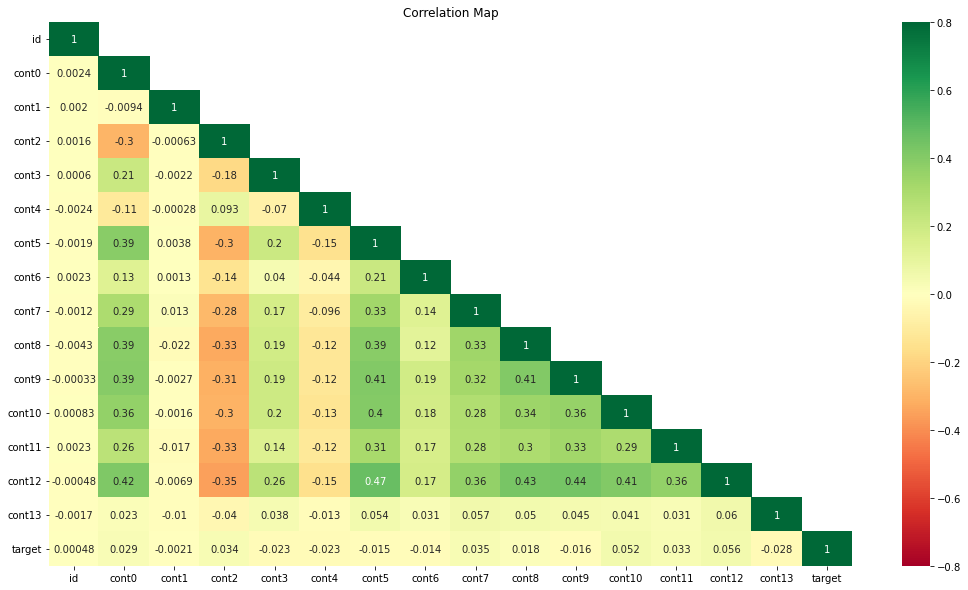

In [13]:
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
fig = plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.title('Correlation Map')
plt.show()


In [14]:
correlation_matrix["target"].sort_values(ascending = False)

target    1.000000
cont12    0.055829
cont10    0.052468
cont7     0.035143
cont2     0.034280
cont11    0.033378
cont0     0.028819
cont8     0.017740
id        0.000480
cont1    -0.002096
cont6    -0.013807
cont5    -0.015058
cont9    -0.015726
cont3    -0.022759
cont4    -0.023132
cont13   -0.028189
Name: target, dtype: float64

In [15]:
df_train.drop(columns = 'id',inplace = True)
df_test_modified = df_test.drop(columns = 'id',inplace =False)

In [16]:
quantitative.remove('id')
quantitative

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'target']

# Encoding Qualitative Data

In [17]:
from sklearn.preprocessing import LabelEncoder
df_train[qualitative] = df_train[qualitative].apply(LabelEncoder().fit_transform)
df_test_modified[qualitative] = df_test_modified[qualitative].apply(LabelEncoder().fit_transform)

In [18]:
df_train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,1,1,2,1,1,0,4,2,13,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,1,1,0,0,1,3,0,5,0,14,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,0,0,0,2,1,3,0,3,0,5,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,1,1,0,2,1,3,0,4,2,10,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,0,0,0,2,1,3,0,4,0,13,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,1,0,0,1,3,0,4,0,8,...,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
299996,0,1,0,2,1,1,0,4,4,5,...,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
299997,1,1,0,2,1,2,0,4,6,5,...,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755
299998,0,1,0,2,1,1,0,4,4,8,...,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569


# Modelling

In [19]:
df_train.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

In [20]:
train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=20)
X_train = train_df.drop(columns = 'target')
y_train = train_df['target']
X_val = val_df.drop(columns = 'target')
y_val = val_df['target']
X_test = df_test_modified

In [21]:
print(f"No of Records (Original Data): {len(df_train)}\nNo of Records (train_df): {len(train_df)}\nNo of Records (val_df) {len(val_df)}")

No of Records (Original Data): 300000
No of Records (train_df): 240000
No of Records (val_df) 60000


In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, PoissonRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [23]:
models = {
    "LinearRegression":            LinearRegression(),
    "Ridge":                       Ridge(),
    "Lasso":                       Lasso(),
    "ElasticNet":                  ElasticNet(),
#     "KNeighborsRegressor":         KNeighborsRegressor(), 
#     "DecisionTreeRegressor":       DecisionTreeRegressor(),
#     "RandomForestRegressor":       RandomForestRegressor(),
#     "BaggingRegressor":            BaggingRegressor(),
    "AdaBoostRegressor":           AdaBoostRegressor(),
    "CatBoostRegressor":           CatBoostRegressor(verbose=False),
    "LGBMRegressor":               LGBMRegressor(),
    "GradientBoostingRegressor":   GradientBoostingRegressor(),
    "XGBRegressor":                XGBRegressor()
}

In [24]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train, y_train)
    print(f"train score : {model.score(X_train,y_train)}")
    print(f'RMSLETrain: { np.sqrt(mean_squared_error(y_train, model.predict(X_train)))}')
    print(f'RMSLEVal: { np.sqrt(mean_squared_error(y_val, model.predict(X_val)))}')
    print('-'*30)

Using model: LinearRegression
train score : 0.019612419677495052
RMSLETrain: 0.7403353497454035
RMSLEVal: 0.7344606055979458
------------------------------
Using model: Ridge
train score : 0.019612419428624572
RMSLETrain: 0.7403353498393703
RMSLEVal: 0.7344606225020776
------------------------------
Using model: Lasso
train score : 0.0
RMSLETrain: 0.7477037972490317
RMSLEVal: 0.7419349666768976
------------------------------
Using model: ElasticNet
train score : 0.0
RMSLETrain: 0.7477037972490317
RMSLEVal: 0.7419349666768976
------------------------------
Using model: AdaBoostRegressor
train score : -0.0910700071058217
RMSLETrain: 0.7810087418123274
RMSLEVal: 0.7760876532061453
------------------------------
Using model: CatBoostRegressor
train score : 0.12330659818223932
RMSLETrain: 0.7000893244638187
RMSLEVal: 0.7167129264877417
------------------------------
Using model: LGBMRegressor
train score : 0.0778886712112491
RMSLETrain: 0.7179947440366572
RMSLEVal: 0.7204148742210911
------

## Test Model and Submit file

In [25]:
# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}
# model=CatBoostRegressor(verbose=False)
# grid_search_result = model.grid_search(grid, 
#                                        X=X_train, 
#                                        y=y_train, 
#                                        plot=True)

In [26]:
x=np.linspace(0.14,0.16,20)
x

array([0.14      , 0.14105263, 0.14210526, 0.14315789, 0.14421053,
       0.14526316, 0.14631579, 0.14736842, 0.14842105, 0.14947368,
       0.15052632, 0.15157895, 0.15263158, 0.15368421, 0.15473684,
       0.15578947, 0.15684211, 0.15789474, 0.15894737, 0.16      ])

In [27]:
# Model=CatBoostRegressor(verbose=False,n_estimators=400,learning_rate=0.02)
# Model=XGBRegressor(learning_rate = 0.5 ,random_state = 42)
# Model=LGBMRegressor()---> 0.72644 in kaggle
for i in [1]:
    print(f"@ i = {i}")
    Model=CatBoostRegressor(n_estimators=700,loss_function='MAE',verbose=False, learning_rate= 0.15894736842105264,depth=4)
    Model.fit(X_train, y_train)
    print(f'RMSLETrain: { np.sqrt(mean_squared_error(y_train, Model.predict(X_train)))}')
    print(f'RMSLEVal: { np.sqrt(mean_squared_error(y_val, Model.predict(X_val)))}')
    print("_"*20)

@ i = 1
RMSLETrain: 0.7170222025004366
RMSLEVal: 0.7202336959267615
____________________


In [28]:
y_test_predicted = Model.predict(X_test)
output = pd.DataFrame({'id': df_test['id'], 'target': y_test_predicted})
output.to_csv('my_submission.csv', index=False)